In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("/content/drive/MyDrive/YELP/yelp_3cities_refined.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df

,business_id,user_id,review_stars,useful_x,text,date
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22 00:53:22
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22 05:00:12
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08 19:55:43
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14 18:24:31
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03 02:47:14
...,...,...,...,...,...,...
197944,6f4wzV8gi3SBSbigMFuLdA,nKN2AJWiArA8IeOUExyB8w,5,0,Just had takeout from Golden Dynasty. \nGenera...,2020-12-17 01:22:03
197945,Ii-aCAM4KG6RCvpMn0hOkg,e-DXoZTMNzDOhHMrYZN5zQ,4,0,Totally solid Thai food. Not bad at all. I've ...,2019-06-19 01:22:54
197946,Uo6k2_14sdUhVJF9YxnMcg,iSxnRdziDntu5TL3ki_bfQ,5,0,"Our server Joey was great! She was so kind, we...",2020-08-06 04:22:45
197947,aesuEZoyNuctrsKzo-OIUA,icBK1FERu8d_uU6cBwy2Uw,5,0,This place is amazing!! Had the burrito last t...,2020-05-14 21:37:18


In [9]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [10]:
df

,business_id,user_id,review_stars,useful_x,text,date
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03
...,...,...,...,...,...,...
197944,6f4wzV8gi3SBSbigMFuLdA,nKN2AJWiArA8IeOUExyB8w,5,0,Just had takeout from Golden Dynasty. \nGenera...,2020-12-17
197945,Ii-aCAM4KG6RCvpMn0hOkg,e-DXoZTMNzDOhHMrYZN5zQ,4,0,Totally solid Thai food. Not bad at all. I've ...,2019-06-19
197946,Uo6k2_14sdUhVJF9YxnMcg,iSxnRdziDntu5TL3ki_bfQ,5,0,"Our server Joey was great! She was so kind, we...",2020-08-06
197947,aesuEZoyNuctrsKzo-OIUA,icBK1FERu8d_uU6cBwy2Uw,5,0,This place is amazing!! Had the burrito last t...,2020-05-14


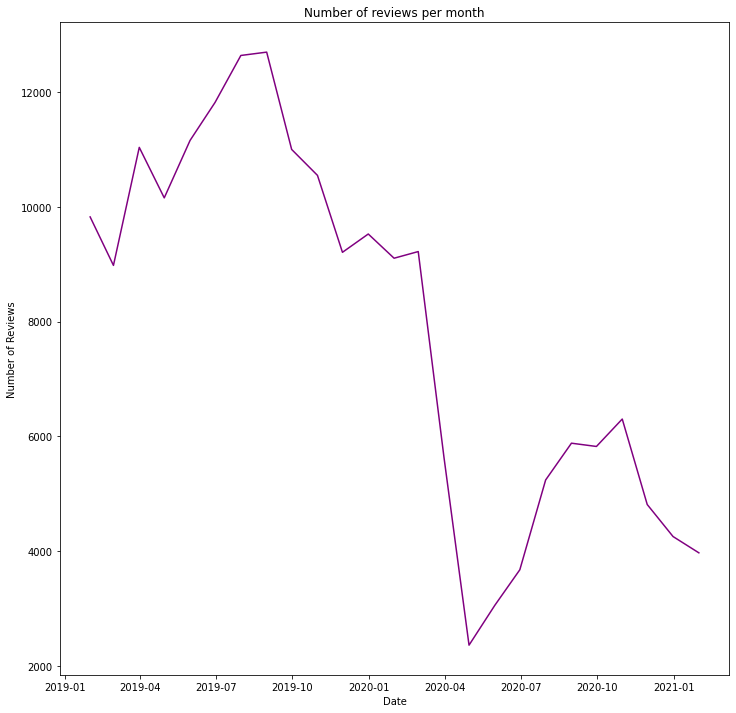

In [11]:
# Create figure and plot space

import matplotlib.pyplot as plt
import datetime
import pandas as pd
fig, ax = plt.subplots(figsize=(12, 12))
df['date'] = pd.to_datetime(df['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
df = df.set_index('date')
y = df['text'].resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Reviews",
       title="Number of reviews per month")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

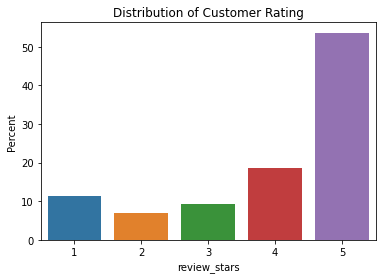

In [12]:
import seaborn as sns
ax = sns.barplot(data=df, x='review_stars', y='review_stars', estimator=lambda x: 
                 len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

In [13]:
df

,business_id,user_id,review_stars,useful_x,text
date,,,,,
2019-01-22,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...
2019-06-22,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...
2020-03-08,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...
2020-03-14,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...
2020-12-03,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...
...,...,...,...,...,...
2020-12-17,6f4wzV8gi3SBSbigMFuLdA,nKN2AJWiArA8IeOUExyB8w,5,0,Just had takeout from Golden Dynasty. \nGenera...
2019-06-19,Ii-aCAM4KG6RCvpMn0hOkg,e-DXoZTMNzDOhHMrYZN5zQ,4,0,Totally solid Thai food. Not bad at all. I've ...
2020-08-06,Uo6k2_14sdUhVJF9YxnMcg,iSxnRdziDntu5TL3ki_bfQ,5,0,"Our server Joey was great! She was so kind, we..."


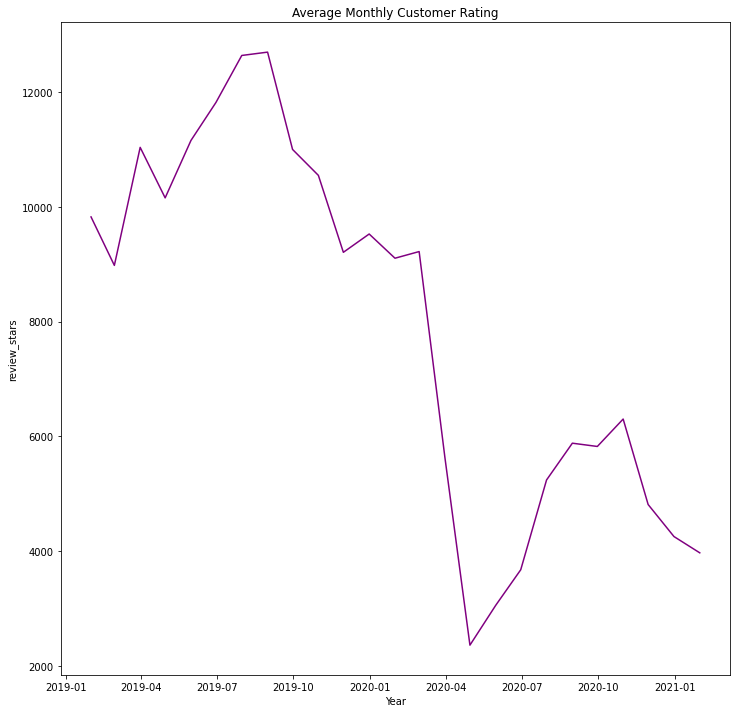

In [14]:
#plt.plot(df['review_stars'].resample('M').mean())
#plt.xlabel('Year')
#plt.ylabel('review_stars')
#plt.title('Average Monthly Customer Rating')
#plt.ylim(0,5)
#plt.show()


# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt
import datetime
import pandas as pd
#df['date'] = pd.to_datetime(df['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
#df = df.set_index('date')
y = df['review_stars'].resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="review_stars",
       title="Average Monthly Customer Rating")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

In [15]:
df['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in df['text']]

Text(0.5, 1.0, 'Review Stars')

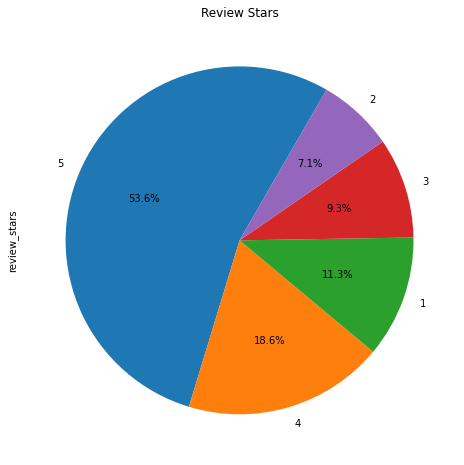

In [16]:
#Let's see the distribution of each star rating as a pie chart
#This way we can see that most of our data contains positive comments by costumers
plt.figure(figsize=(8,8))
df['review_stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Review Stars')

In [17]:
df2=pd.read_csv("/content/drive/MyDrive/YELP/covid_county_data2.csv")

In [18]:
df2

,Unnamed: 0,date,county,state,fips,cases,deaths
0,44,2020-02-01,Suffolk,Massachusetts,25025.0,1,0.0
1,52,2020-02-02,Suffolk,Massachusetts,25025.0,1,0.0
2,60,2020-02-03,Suffolk,Massachusetts,25025.0,1,0.0
3,68,2020-02-04,Suffolk,Massachusetts,25025.0,1,0.0
4,76,2020-02-05,Suffolk,Massachusetts,25025.0,1,0.0
...,...,...,...,...,...,...,...
1952,1978106,2021-12-03,Multnomah,Oregon,41051.0,60720,847.0
1953,1981356,2021-12-04,Multnomah,Oregon,41051.0,60720,847.0
1954,1984606,2021-12-05,Multnomah,Oregon,41051.0,60720,847.0
1955,1987856,2021-12-06,Multnomah,Oregon,41051.0,61066,850.0


In [19]:
df2["date"] = pd.to_datetime(df2["date"])

df3 = df2.sort_values(by="date")

In [20]:
df3

,Unnamed: 0,date,county,state,fips,cases,deaths
0,44,2020-02-01,Suffolk,Massachusetts,25025.0,1,0.0
1,52,2020-02-02,Suffolk,Massachusetts,25025.0,1,0.0
2,60,2020-02-03,Suffolk,Massachusetts,25025.0,1,0.0
3,68,2020-02-04,Suffolk,Massachusetts,25025.0,1,0.0
4,76,2020-02-05,Suffolk,Massachusetts,25025.0,1,0.0
...,...,...,...,...,...,...,...
1317,1985864,2021-12-06,Douglas,Colorado,8035.0,47229,348.0
1955,1987856,2021-12-06,Multnomah,Oregon,41051.0,61066,850.0
1318,1989114,2021-12-07,Douglas,Colorado,8035.0,47511,352.0
675,1990092,2021-12-07,Suffolk,Massachusetts,25025.0,115874,1946.0


In [21]:
print(df3.dtypes)

Unnamed: 0             int64
date          datetime64[ns]
county                object
state                 object
fips                 float64
cases                  int64
deaths               float64
dtype: object


In [22]:
df_douglas=pd.read_csv("/content/drive/MyDrive/YELP/douglas.csv")

In [23]:
df_douglas

,Unnamed: 0,date,county,state,fips,cases,deaths
0,548,2020-03-05,Douglas,Colorado,8035.0,1,0.0
1,600,2020-03-06,Douglas,Colorado,8035.0,3,0.0
2,678,2020-03-07,Douglas,Colorado,8035.0,3,0.0
3,773,2020-03-08,Douglas,Colorado,8035.0,3,0.0
4,889,2020-03-09,Douglas,Colorado,8035.0,3,0.0
...,...,...,...,...,...,...,...
638,1976114,2021-12-03,Douglas,Colorado,8035.0,46990,347.0
639,1979364,2021-12-04,Douglas,Colorado,8035.0,46990,347.0
640,1982614,2021-12-05,Douglas,Colorado,8035.0,47159,347.0
641,1985864,2021-12-06,Douglas,Colorado,8035.0,47229,348.0


In [24]:
df_douglas['date'] = pd.to_datetime(df_douglas['date']).dt.date

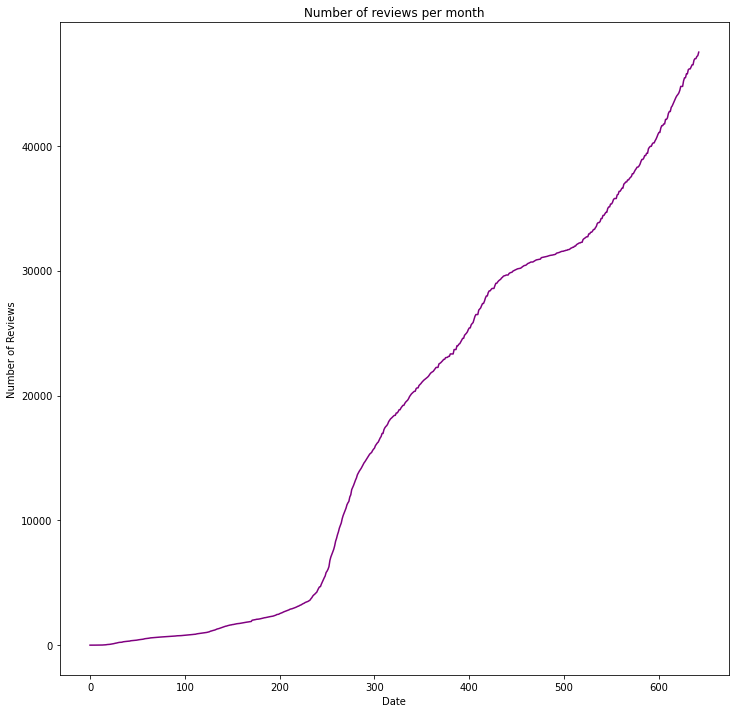

In [25]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt
import datetime
import pandas as pd
#df_douglas['date'] = pd.to_datetime(df_douglas['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
#df_douglas = df_douglas.set_index('date')
y = df_douglas['cases']#.resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Reviews",
       title="Number of reviews per month")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

In [27]:
df_suffolk=pd.read_csv("/content/drive/MyDrive/YELP/suffolk.csv")

In [28]:
df_suffolk

,Unnamed: 0,date,county,state,fips,cases,deaths
0,44,2020-02-01,Suffolk,Massachusetts,25025.0,1,0.0
1,52,2020-02-02,Suffolk,Massachusetts,25025.0,1,0.0
2,60,2020-02-03,Suffolk,Massachusetts,25025.0,1,0.0
3,68,2020-02-04,Suffolk,Massachusetts,25025.0,1,0.0
4,76,2020-02-05,Suffolk,Massachusetts,25025.0,1,0.0
...,...,...,...,...,...,...,...
671,1977092,2021-12-03,Suffolk,Massachusetts,25025.0,114395,1945.0
672,1980342,2021-12-04,Suffolk,Massachusetts,25025.0,114395,1945.0
673,1983592,2021-12-05,Suffolk,Massachusetts,25025.0,114395,1945.0
674,1986842,2021-12-06,Suffolk,Massachusetts,25025.0,115434,1945.0


In [29]:
df_suffolk['date'] = pd.to_datetime(df_suffolk['date']).dt.date

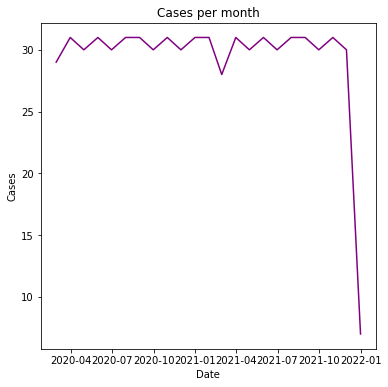

In [30]:
# Create figure and plot space

import matplotlib.pyplot as plt
import datetime
import pandas as pd
fig, ax = plt.subplots(figsize=(6, 6))
df_suffolk['date'] = pd.to_datetime(df_suffolk['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
df_suffolk = df_suffolk.set_index('date')
y = df_suffolk['cases'].resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Cases per month")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

In [31]:
df_multnomah=pd.read_csv("/content/drive/MyDrive/YELP/multnomah.csv")

In [32]:
df_multnomah['date'] = pd.to_datetime(df_multnomah['date']).dt.date

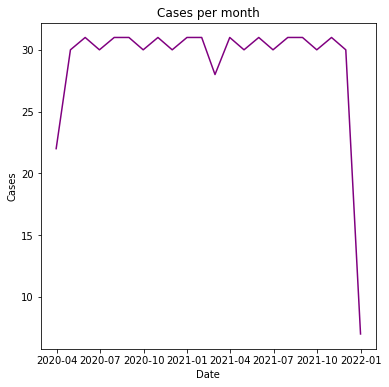

In [33]:
# Create figure and plot space

import matplotlib.pyplot as plt
import datetime
import pandas as pd
fig, ax = plt.subplots(figsize=(6, 6))
df_multnomah['date'] = pd.to_datetime(df_multnomah['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
df_multnomah = df_multnomah.set_index('date')
y = df_multnomah['cases'].resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Cases per month")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

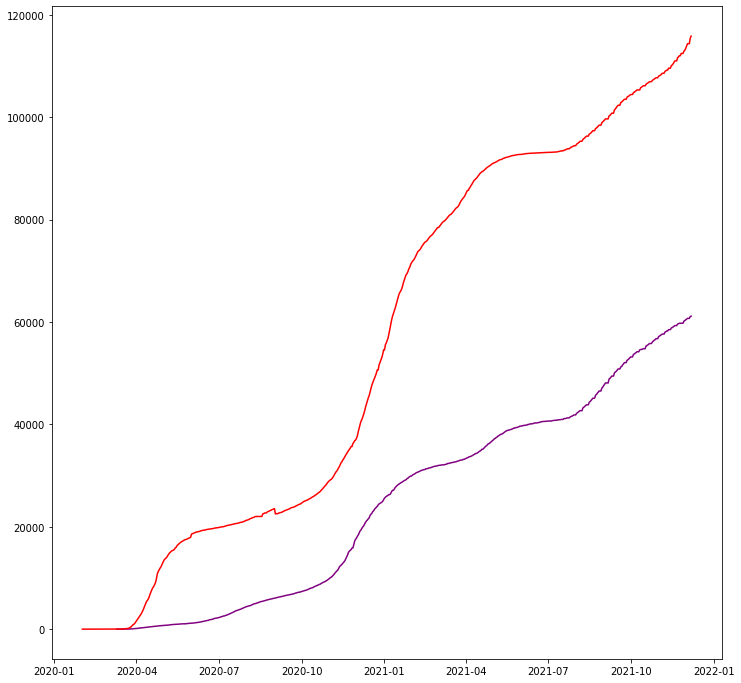

In [35]:
y1 = df_multnomah['cases']
y2 = df_suffolk['cases']
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(y1,color='purple')
ax.plot(y2,color='red')
plt.show()

In [36]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [60]:
df_p=pd.read_csv("/content/drive/MyDrive/yelp_dataset/final_data_yelp2.csv")

In [38]:
df_p

,Unnamed: 0,Unnamed: 0.1,business_id,city,state_x,user_id,review_stars,useful_x,text,date,useful_y,fans,Smogscore,review_word_count,Polarity,Analysis_TextBlob,Vader Sentiment,Vader Analysis,fips,cases,deaths,label
0,0,0,uexKxrLmPO5iaXRT9TvWqQ,Portland,OR,1eSNY9Csb9ajO7__ci2vTA,3.0,0.0,Yes I am a fan of the food Ive tried more ...,2019-01-01,0.0,0.0,13.4,251.0,0.050208,Positive,0.7723,Positive,0.0,0.0,0.0,1.0
1,1,1,b4PgITSqSWoPhyJ-Mjko7Q,Portland,OR,KYCpm1B9eIIgbPatCIcVkg,4.0,0.0,Im not a bubble tea connoisseur but Ive had it...,2019-01-01,328.0,6.0,0.0,46.0,0.263889,Positive,0.8519,Positive,0.0,0.0,0.0,1.0
2,2,2,2EJpVjliJ6Ceijbz9HSpeQ,Portland,OR,f1lLNjrLk4ETU2t_N7fHbA,5.0,1.0,Fantastic authentic Italian food the pinsa ha...,2019-01-01,8.0,0.0,12.2,74.0,0.360000,Positive,0.9307,Positive,0.0,0.0,0.0,1.0
3,3,3,7m_Tj6xC5CjulQ-6Wucdpw,Portland,OR,uOSQbOnLRlAuWfCSCwQFnA,5.0,0.0,Good food very authentic The owner is pretty f...,2019-01-01,1.0,0.0,6.4,16.0,0.425000,Positive,0.9169,Positive,0.0,0.0,0.0,1.0
4,4,4,DgvT9AiuePR8Z0SKV5BFvw,Portland,OR,bSTMk_GXsPE93COgqUDnMg,4.0,0.0,The service is outstanding and the pasta is go...,2019-01-01,0.0,0.0,8.8,39.0,0.450000,Positive,0.9217,Positive,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197944,197944,197944,BO4Usu_YSE7jlmchGMeVcw,Boston,MA,d3-SRpRr8SX2TZNOv4_dqg,4.0,0.0,I have to admit Shin Hakata Ramen was truly im...,2021-01-28,2.0,0.0,10.1,45.0,0.650000,Positive,0.9755,Positive,25025.0,70398.0,1548.0,1.0
197945,197945,197945,-WG2sv6ApNh1fa7ot-QAEA,Boston,MA,VZDjY7dU8gmraqr3oRCj-A,5.0,0.0,The BEST Rueben in Boston Hands down And I hav...,2021-01-28,1.0,0.0,6.4,27.0,0.250000,Positive,0.4995,Neutral,25025.0,70398.0,1548.0,1.0
197946,197946,197946,EbUZhM4fLpsWQ8fpBhhgEQ,Boston,MA,RcAvNzBP3e9TxZZpfpohOA,5.0,0.0,Mike Pattys is such a cool neighborhood gem I...,2021-01-28,0.0,0.0,10.8,42.0,0.242857,Positive,0.9521,Positive,25025.0,70398.0,1548.0,1.0
197947,197947,197947,IqyqfQFnBsOIReGrcgaYhA,Boston,MA,DJctK3XMg_8-zFZYY8puKA,2.0,0.0,Store is a little hard to find since it is hid...,2021-01-28,1.0,0.0,0.0,32.0,-0.038889,Negative,0.1761,Neutral,25025.0,70398.0,1548.0,1.0


In [43]:
grouped = df_p.groupby(df_p.label)

df_label = grouped.get_group(1.0)

In [42]:
grouped

In [44]:
df_label

,Unnamed: 0,Unnamed: 0.1,business_id,city,state_x,user_id,review_stars,useful_x,text,date,useful_y,fans,Smogscore,review_word_count,Polarity,Analysis_TextBlob,Vader Sentiment,Vader Analysis,fips,cases,deaths,label
0,0,0,uexKxrLmPO5iaXRT9TvWqQ,Portland,OR,1eSNY9Csb9ajO7__ci2vTA,3.0,0.0,Yes I am a fan of the food Ive tried more ...,2019-01-01,0.0,0.0,13.4,251.0,0.050208,Positive,0.7723,Positive,0.0,0.0,0.0,1.0
1,1,1,b4PgITSqSWoPhyJ-Mjko7Q,Portland,OR,KYCpm1B9eIIgbPatCIcVkg,4.0,0.0,Im not a bubble tea connoisseur but Ive had it...,2019-01-01,328.0,6.0,0.0,46.0,0.263889,Positive,0.8519,Positive,0.0,0.0,0.0,1.0
2,2,2,2EJpVjliJ6Ceijbz9HSpeQ,Portland,OR,f1lLNjrLk4ETU2t_N7fHbA,5.0,1.0,Fantastic authentic Italian food the pinsa ha...,2019-01-01,8.0,0.0,12.2,74.0,0.360000,Positive,0.9307,Positive,0.0,0.0,0.0,1.0
3,3,3,7m_Tj6xC5CjulQ-6Wucdpw,Portland,OR,uOSQbOnLRlAuWfCSCwQFnA,5.0,0.0,Good food very authentic The owner is pretty f...,2019-01-01,1.0,0.0,6.4,16.0,0.425000,Positive,0.9169,Positive,0.0,0.0,0.0,1.0
4,4,4,DgvT9AiuePR8Z0SKV5BFvw,Portland,OR,bSTMk_GXsPE93COgqUDnMg,4.0,0.0,The service is outstanding and the pasta is go...,2019-01-01,0.0,0.0,8.8,39.0,0.450000,Positive,0.9217,Positive,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197944,197944,197944,BO4Usu_YSE7jlmchGMeVcw,Boston,MA,d3-SRpRr8SX2TZNOv4_dqg,4.0,0.0,I have to admit Shin Hakata Ramen was truly im...,2021-01-28,2.0,0.0,10.1,45.0,0.650000,Positive,0.9755,Positive,25025.0,70398.0,1548.0,1.0
197945,197945,197945,-WG2sv6ApNh1fa7ot-QAEA,Boston,MA,VZDjY7dU8gmraqr3oRCj-A,5.0,0.0,The BEST Rueben in Boston Hands down And I hav...,2021-01-28,1.0,0.0,6.4,27.0,0.250000,Positive,0.4995,Neutral,25025.0,70398.0,1548.0,1.0
197946,197946,197946,EbUZhM4fLpsWQ8fpBhhgEQ,Boston,MA,RcAvNzBP3e9TxZZpfpohOA,5.0,0.0,Mike Pattys is such a cool neighborhood gem I...,2021-01-28,0.0,0.0,10.8,42.0,0.242857,Positive,0.9521,Positive,25025.0,70398.0,1548.0,1.0
197947,197947,197947,IqyqfQFnBsOIReGrcgaYhA,Boston,MA,DJctK3XMg_8-zFZYY8puKA,2.0,0.0,Store is a little hard to find since it is hid...,2021-01-28,1.0,0.0,0.0,32.0,-0.038889,Negative,0.1761,Neutral,25025.0,70398.0,1548.0,1.0


In [45]:
grouped = df_p.groupby(df_p.label)

df_label2 = grouped.get_group(0.0)

In [46]:
df_label2

,Unnamed: 0,Unnamed: 0.1,business_id,city,state_x,user_id,review_stars,useful_x,text,date,useful_y,fans,Smogscore,review_word_count,Polarity,Analysis_TextBlob,Vader Sentiment,Vader Analysis,fips,cases,deaths,label
8,8,8,wrVwYzAM-KzUfw2KHLysgg,Portland,OR,dF1repvomIDaG-yU2GY29g,1.0,0.0,The lights are on theres an open sign in the w...,2019-01-01,3.0,0.0,0.0,60.0,-0.028571,Negative,-0.7184,Negative,0.0,0.0,0.0,0.0
28,28,28,iPVQBxRhnM2QuHkRnGm9VA,Portland,OR,tsw4Kg1CgFzUGoLJ8drHXg,1.0,0.0,I have peking duck on my mind and call 5 days ...,2019-01-01,2.0,2.0,7.5,159.0,-0.141667,Negative,-0.7269,Negative,0.0,0.0,0.0,0.0
38,38,38,LF0EuyDA4-rhb6s36q0wsQ,Portland,OR,3VGgsKynVjVXnbpaA-SZ2w,1.0,0.0,Horrible experience We flew out from San Diego...,2019-01-01,1.0,0.0,11.6,79.0,-0.314286,Negative,-0.0742,Neutral,0.0,0.0,0.0,0.0
40,40,40,Wd8Zaf8R5rE9Uu040BMDtA,Portland,OR,bCXFgsNC7SBCRn9ssjNw2w,3.0,1.0,It pains me to give only three stars as the fo...,2019-01-01,1.0,0.0,8.1,86.0,-0.105417,Negative,-0.2809,Neutral,0.0,0.0,0.0,0.0
97,97,97,Zg7_6HtS7ZOihRSey8rnpw,Portland,OR,XUVRHfpuv4ar6nB-QIUFSQ,1.0,1.0,My friend and I went to the Red Rabin on Grand...,2019-01-01,7.0,0.0,8.0,201.0,-0.114667,Negative,-0.7616,Negative,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197890,197890,197890,Ml3RevpxZKmwSmDRNzMY5A,Boston,MA,lpY5f5TVn1O3T5rgQTQcMA,1.0,0.0,Warning DO NOT order takeout from Figs in Beac...,2021-01-27,47.0,2.0,7.8,158.0,-0.150000,Negative,-0.9586,Negative,25025.0,69882.0,1541.0,0.0
197896,197896,197896,8Hs6GKIaGoLLnY74leyNLQ,Boston,MA,DoPMEX6tJl-G99E0zi3agA,1.0,0.0,Fried chicken has very distinctive smell that ...,2021-01-27,0.0,0.0,7.8,58.0,-0.450000,Negative,-0.4019,Neutral,25025.0,69882.0,1541.0,0.0
197903,197903,197903,1sehXiCONsgT0PpG08-nvg,Boston,MA,0aT56_BjLyMi_NyL8tLGVA,1.0,0.0,HORRIBLE HORRIBLE staff Boyfriend and I went t...,2021-01-28,7.0,2.0,8.2,94.0,-0.074405,Negative,-0.8327,Negative,25025.0,70398.0,1548.0,0.0
197908,197908,197908,JZUTavw4SsZ-iiExULq1_g,Boston,MA,h1fmPR75Sdbp423JHP-kog,1.0,1.0,Worst fucking restaurant ever Waitress short A...,2021-01-28,2.0,0.0,7.8,62.0,-0.181818,Negative,-0.8109,Negative,25025.0,70398.0,1548.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


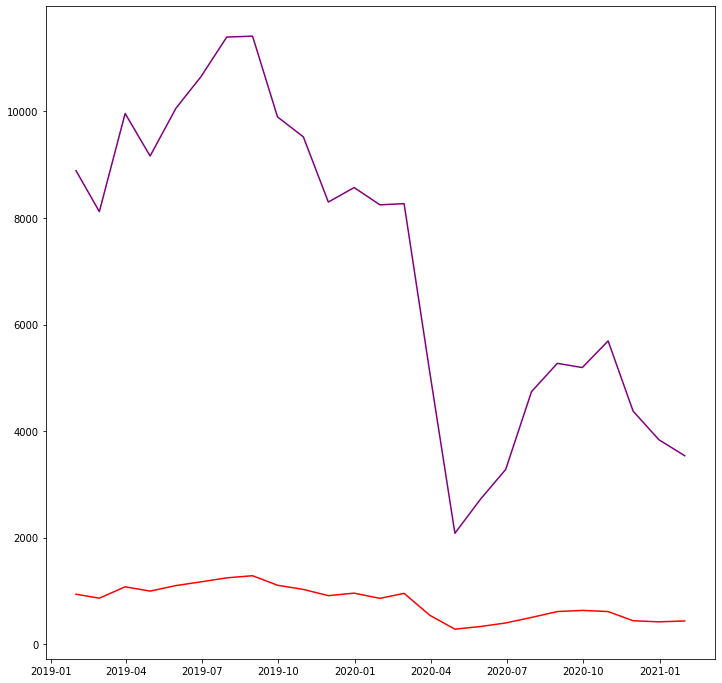

In [49]:
df_label['date'] = pd.to_datetime(df_label['date'])
df_label = df_label.set_index('date')
df_label2['date'] = pd.to_datetime(df_label2['date'])
df_label2 = df_label2.set_index('date')
y1 = df_label['label'].resample('M').count()
y2 = df_label2['label'].resample('M').count()
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(y1,color='purple')
ax.plot(y2,color='red')
plt.show()

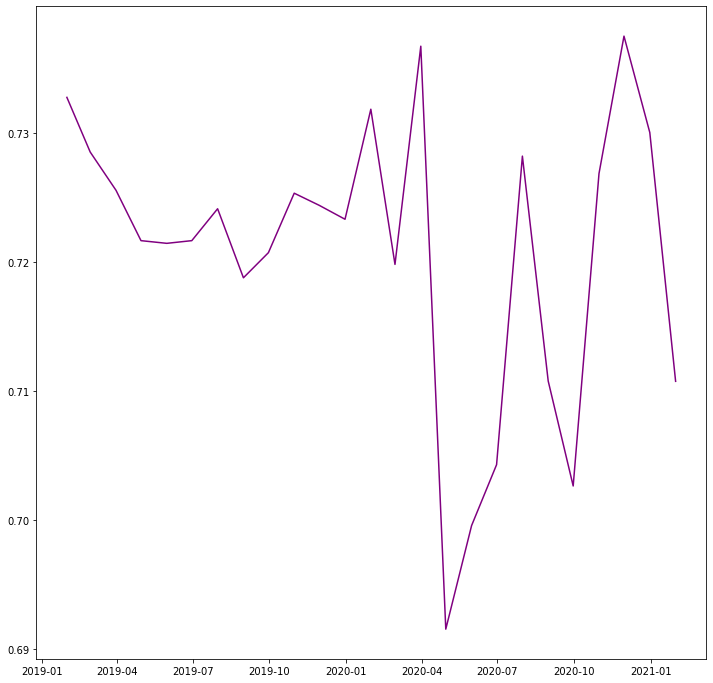

In [50]:
df_p['date'] = pd.to_datetime(df_p['date'])
df_p = df_p.set_index('date')
y1 = df_p['Vader Sentiment'].resample('M').mean()
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(y1,color='purple')
plt.show()

In [53]:
df_p.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'city', 'state_x',
       'user_id', 'review_stars', 'useful_x', 'text', 'useful_y', 'fans',
       'Smogscore', 'review_word_count', 'Polarity', 'Analysis_TextBlob',
       'Vader Sentiment', 'Vader Analysis', 'fips', 'cases', 'deaths',
       'label'],
      dtype='object')

In [61]:
df_p.drop(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'city', 'state_x',
       'user_id', 'review_stars', 'useful_x', 'text', 'useful_y', 'fans',
       'Smogscore', 'review_word_count', 'Polarity', 'Analysis_TextBlob',
       'Vader Analysis', 'fips', 'cases', 'deaths',
       'label'],axis=1,inplace=True)

In [63]:
df_p['date'] = pd.to_datetime(df_p['date'])
df_p = df_p.set_index('date')

In [64]:
df_p

,Vader Sentiment
date,
2019-01-01,0.7723
2019-01-01,0.8519
2019-01-01,0.9307
2019-01-01,0.9169
2019-01-01,0.9217
...,...
2021-01-28,0.9755
2021-01-28,0.4995
2021-01-28,0.9521


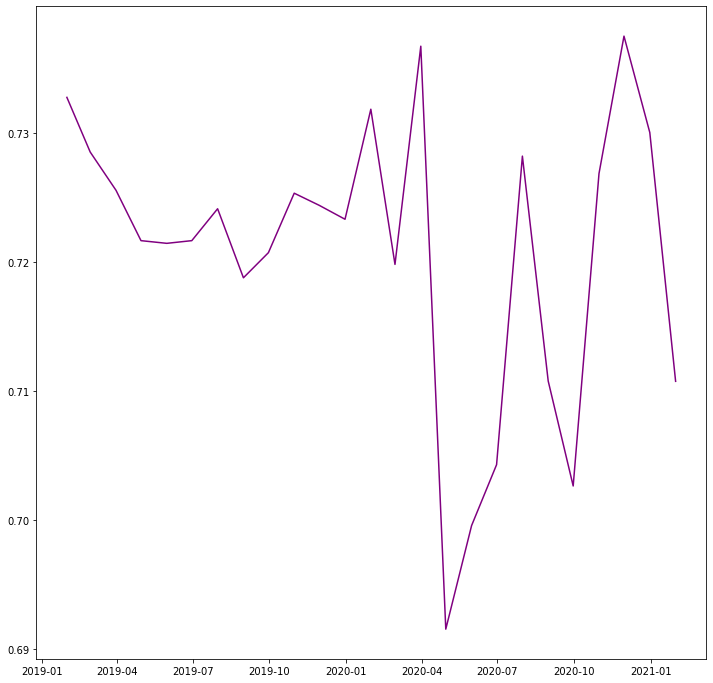

In [65]:
y=df_p.resample('M').mean()
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(y,color='purple')
plt.show()

In [70]:
df_p.tail(40)

,Vader Sentiment
date,
2021-01-28,0.9396
2021-01-28,-0.8074
2021-01-28,0.9422
2021-01-28,0.9868
2021-01-28,0.7125
2021-01-28,0.9710
2021-01-28,0.9876
2021-01-28,0.9911
2021-01-28,0.4639
